In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>


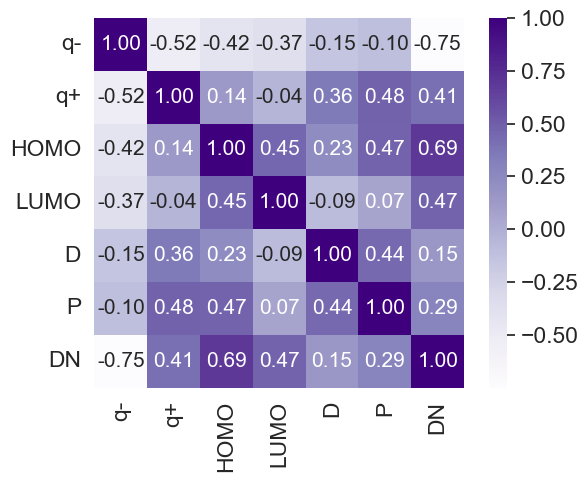

In [2]:
#加载excel
data=pd.read_csv(r'E:\Caculate work\DN_ML\NEW\ML\data.csv')
print(type(data))
#加载输入X与输出y
cols = ['q-', 'q+', 'HOMO', 'LUMO', 'D','P','DN']
cm = np.corrcoef(data[cols].values.T)   #corrcoef方法按行计算皮尔逊相关系数,cm是对称矩阵
#使用np.corrcoef(a)可计算行与行之间的相关系数,np.corrcoef(a,rowvar=0)用于计算各列之间的相关系数,输出为相关系数矩阵。
sns.set(font_scale=1.5)   #font_scale设置字体大小
hm = sns.heatmap(cm,cbar=True,cmap="Purples",annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
# plt.tight_layout()
# plt.savefig('./figures/corr_mat.png', dpi=300)
plt.show()

In [3]:
#加载输入X与输出y
excluded = ["DN"]
X=data.drop(excluded, axis=1)
y=data["DN"].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=188)
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [5]:
#线性回归
lr = LinearRegression()
lr.fit(X_train, y_train)
# 统计R2和RMSE
print('training R2 = ' + str(round(lr.score(X_train, y_train), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=lr.predict(X))))

training R2 = 0.753
training RMSE = 0.173


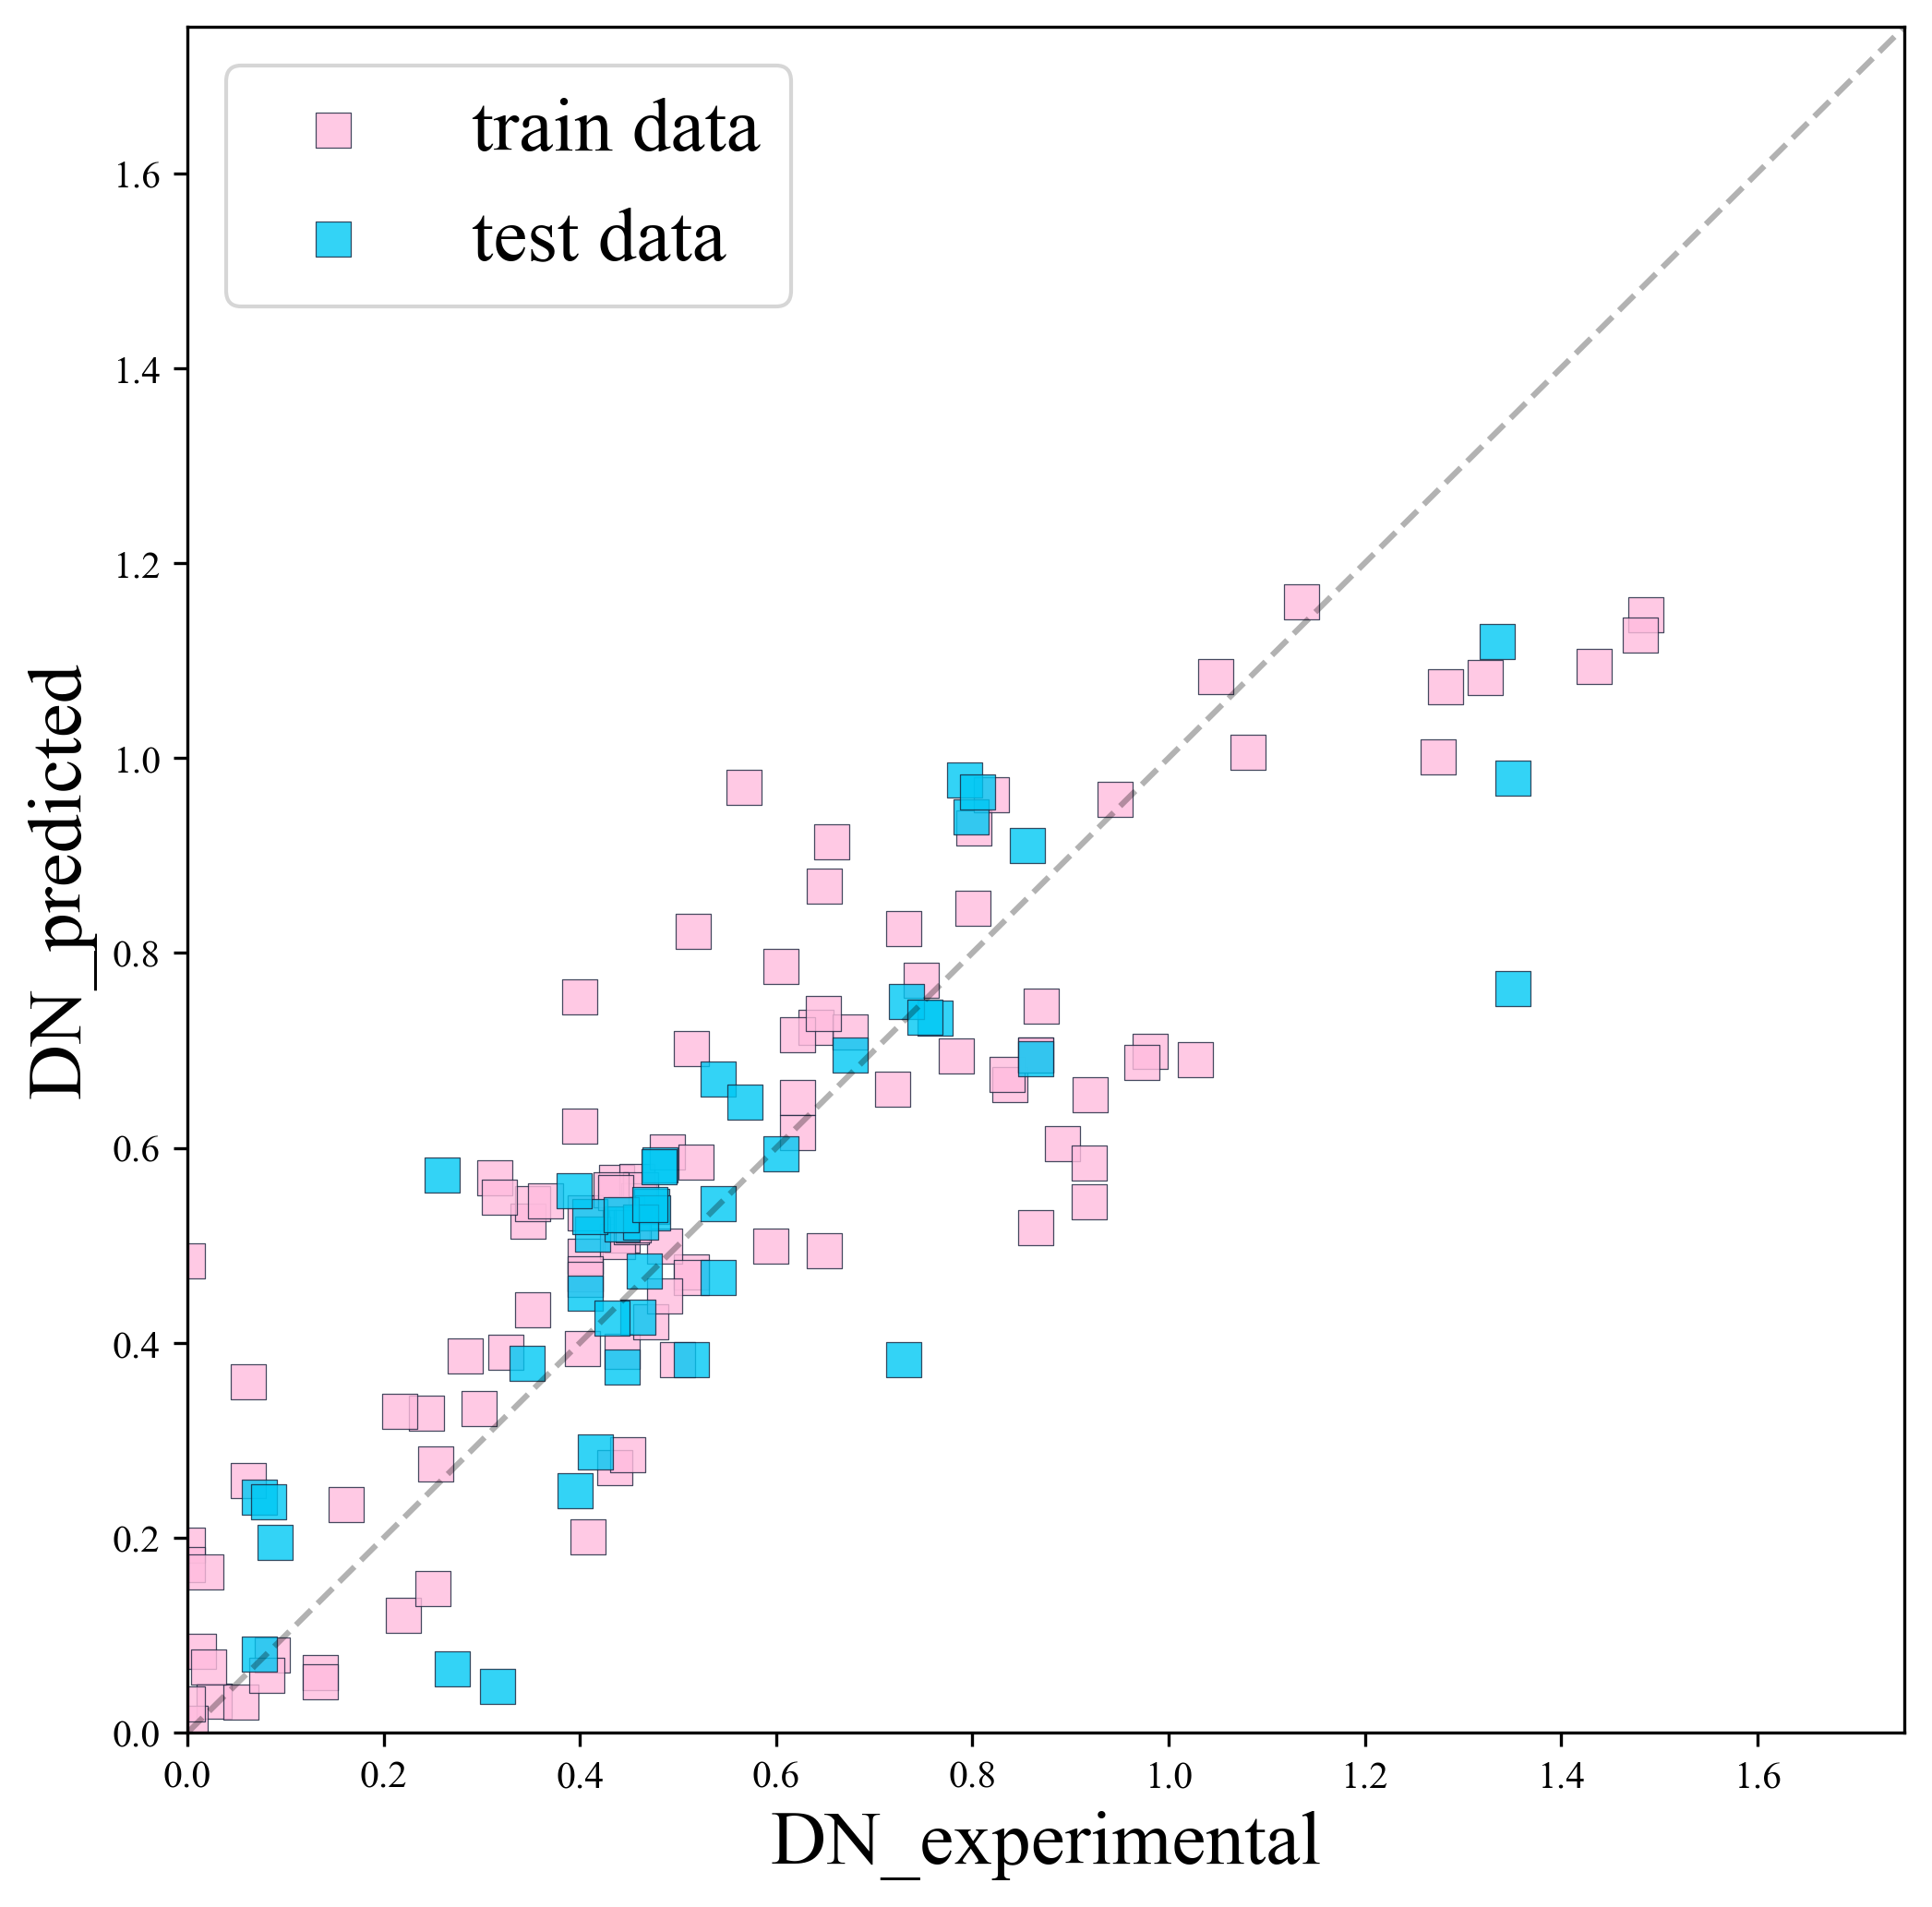

In [41]:
ytrain_pre = lr.predict(X_train)
ytest_pre = lr.predict(X_test)
df= pd.DataFrame({'y_train':y_train, 'ytrain_pre':ytrain_pre})
df.to_csv('LR_train.csv')
df2= pd.DataFrame({'y_test':y_test, 'ytrain_pre':ytest_pre})
df2.to_csv('LR_test.csv')
fig,ax = plt.subplots(figsize=(8, 8), dpi= 300)
plt.rcParams['font.sans-serif'] = ['Times New Roman'] #字体均为 Arial
plt.rcParams['axes.unicode_minus']=False
ax.set_xlabel("DN_experimental",size=20)
ax.set_ylabel("DN_predicted",size=20)
ax.set_xlim(0, 1.75)
ax.set_ylim(0, 1.75)

scatter1 = plt.scatter(x=y_train, y=ytrain_pre, s=80, marker='s',c='#FFBCDE' , alpha=0.8, label='train data', linewidths=0.3, edgecolor='#17223b')
scatter2 = plt.scatter(x=y_test, y=ytest_pre,s=80, marker='s',c='#00C8F4' ,alpha=0.8, label='test data', linewidths=0.3, edgecolor='#17223b')
ax.plot([0,2.0],[0,2.0],'--',c='black',alpha=0.3)
plt.legend(loc='upper left',fontsize=20, frameon=True ,labelspacing=0.5)

In [6]:
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
r2_scores = cross_val_score(lr, X, y, scoring='r2', cv=crossvalidation, n_jobs=1)

print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 0.655
Folds: 10, mean RMSE: 0.180


In [5]:
#随机森林
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,cross_val_score
rf = RandomForestRegressor(n_estimators=50, random_state=1)
rf.fit(X_train, y_train)
print('training R2 = ' + str(round(rf.score(X_train, y_train), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=rf.predict(X))))

training R2 = 0.974
training RMSE = 0.085


In [6]:
from sklearn.model_selection import KFold,cross_val_score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
r2_scores = cross_val_score(rf, X, y, scoring='r2', cv=crossvalidation, n_jobs=-1)
scores = cross_val_score(rf, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=-1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 0.775
Folds: 10, mean RMSE: 0.141


In [7]:
import joblib
joblib.dump(rf,'rf.pkl',compress=3)

['rf.pkl']

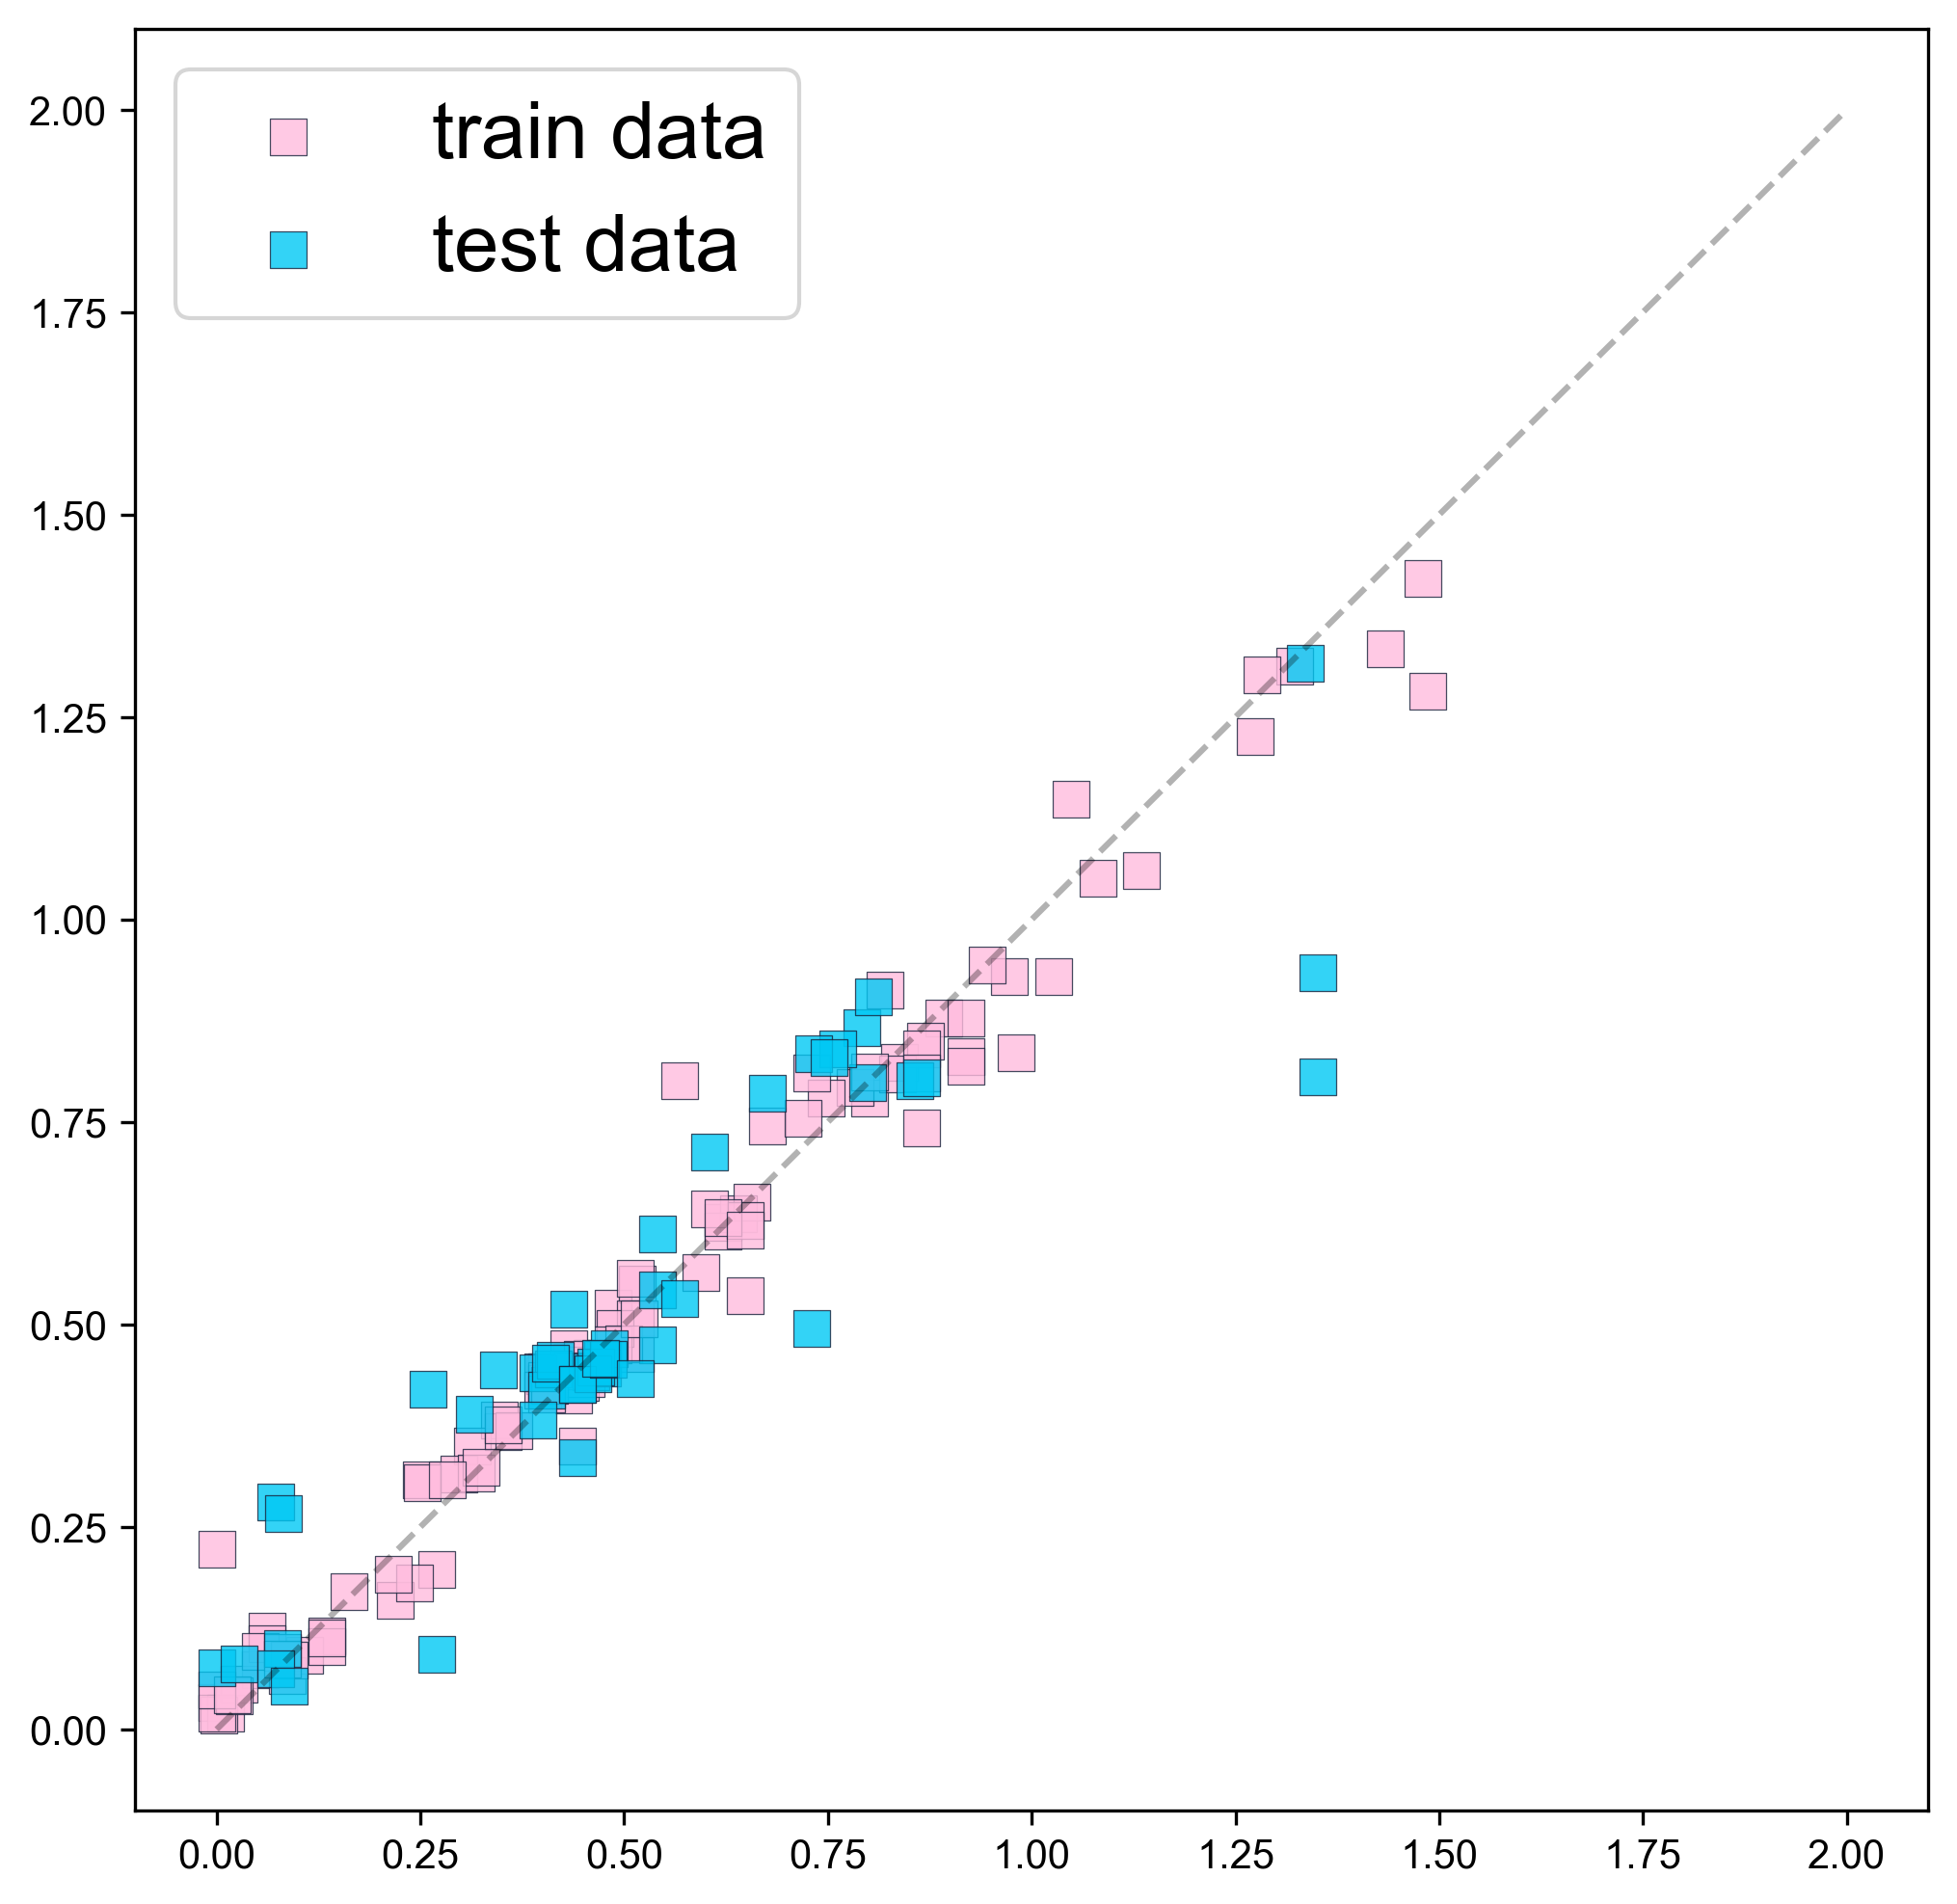

In [45]:
ytrain_pre = rf.predict(X_train)
ytest_pre = rf.predict(X_test)
df= pd.DataFrame({'y_train':y_train, 'ytrain_pre':ytrain_pre})
df.to_csv('RF_train.csv')
df2= pd.DataFrame({'y_test':y_test, 'ytrain_pre':ytest_pre})
df2.to_csv('RF_test.csv')
fig,ax = plt.subplots(figsize=(8, 8), dpi= 300)
plt.rcParams['font.sans-serif'] = ['Arial'] #字体均为 Arial
plt.rcParams['axes.unicode_minus']=False

scatter1 = plt.scatter(x=y_train, y=ytrain_pre, s=80, marker='s',c='#FFBCDE' , alpha=0.8, label='train data', linewidths=0.3, edgecolor='#17223b')
scatter2 = plt.scatter(x=y_test, y=ytest_pre,s=80, marker='s',c='#00C8F4' ,alpha=0.8, label='test data', linewidths=0.3, edgecolor='#17223b')
ax.plot([0,2.0],[0,2.0],'--',c='black',alpha=0.3)
plt.legend(loc='upper left',fontsize=20, frameon=True ,labelspacing=0.5)

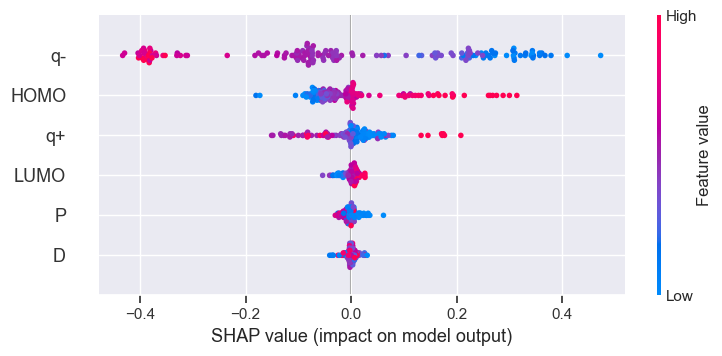

In [11]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

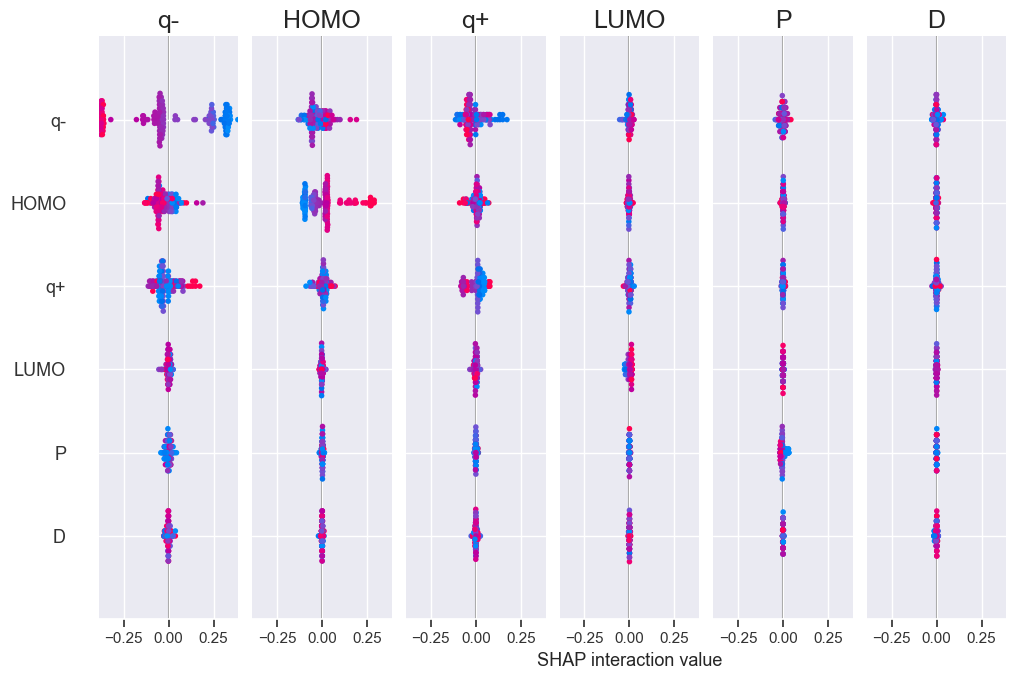

In [12]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

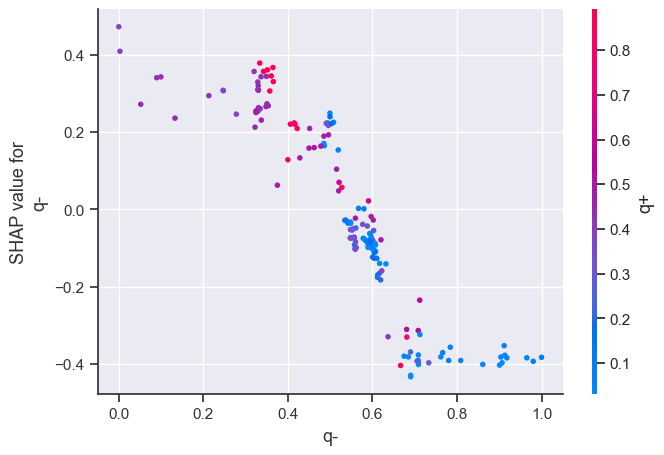

In [16]:
shap.dependence_plot("q-", shap_values, X)

In [17]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [9]:
from sklearn import ensemble
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
gbr = ensemble.GradientBoostingRegressor(**params)


In [10]:
# 估计器拟合训练数据
gbr.fit(X_train, y_train)
 
# 训练完的估计器对测试数据进行预测
y_pred = gbr.predict(X_test)
 
# 输出MSE、R^2、特征重要性列表

train_mse = mean_squared_error(y_train, gbr.predict(X_train))
test_mse = mean_squared_error(y_test, gbr.predict(X_test))
train_score = gbr.score(X_train,y_train)
test_score = gbr.score(X_test,y_test)
print("The mean squared error (MSE) on train set: {:.4f}".format(train_mse))
print("The mean squared error (MSE) on test set: {:.4f}".format(test_mse))
print("The R^2 on train set: {:.4f}".format(train_score))
print("The R^2 on test set: {:.4f}".format(test_score))
print(gbr.feature_importances_)

The mean squared error (MSE) on train set: 0.0005
The mean squared error (MSE) on test set: 0.0204
The R^2 on train set: 0.9959
The R^2 on test set: 0.7851
[0.64711924 0.19322398 0.10961611 0.01330785 0.02034569 0.01638713]


In [11]:
joblib.dump(gbr,'gbr.pkl',compress=3)

['gbr.pkl']

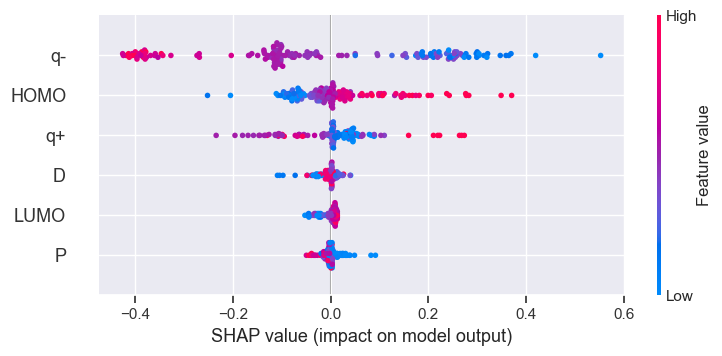

In [11]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

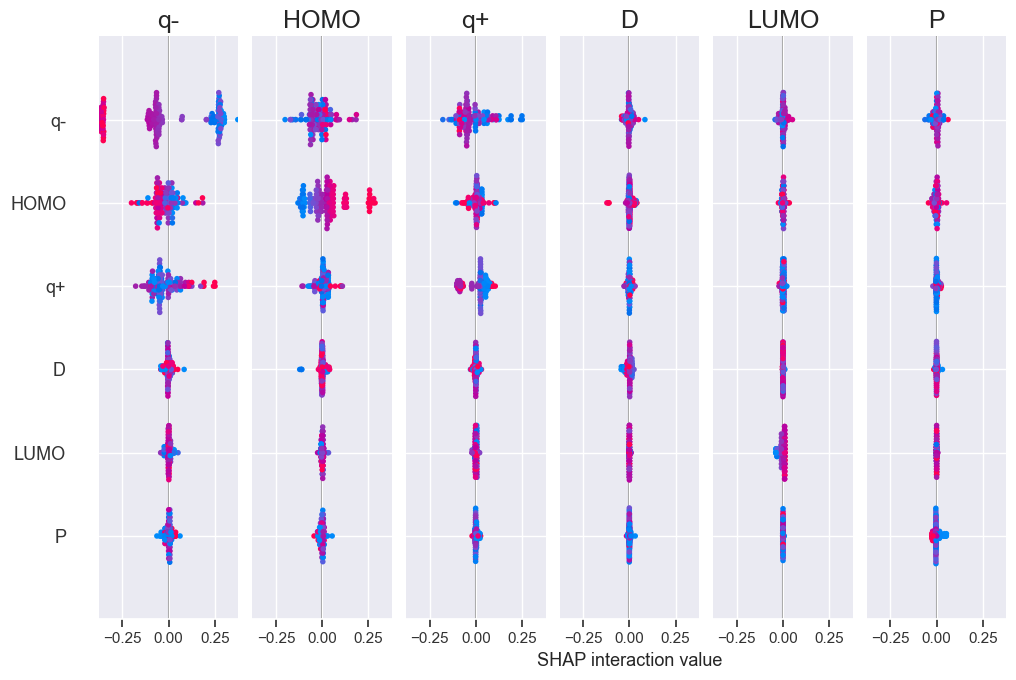

In [21]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

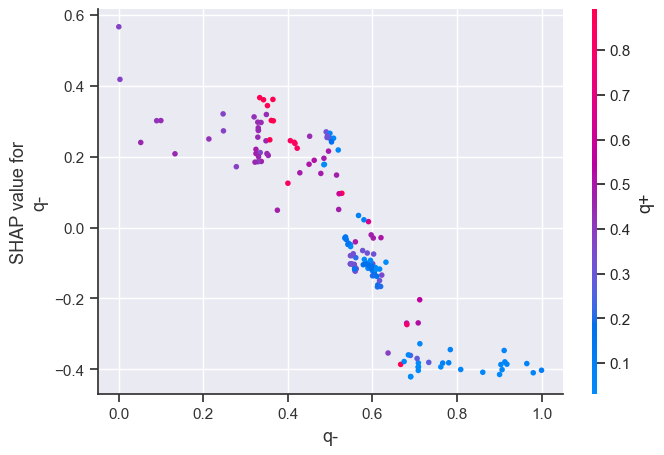

In [22]:
shap.dependence_plot("q-", shap_values, X)

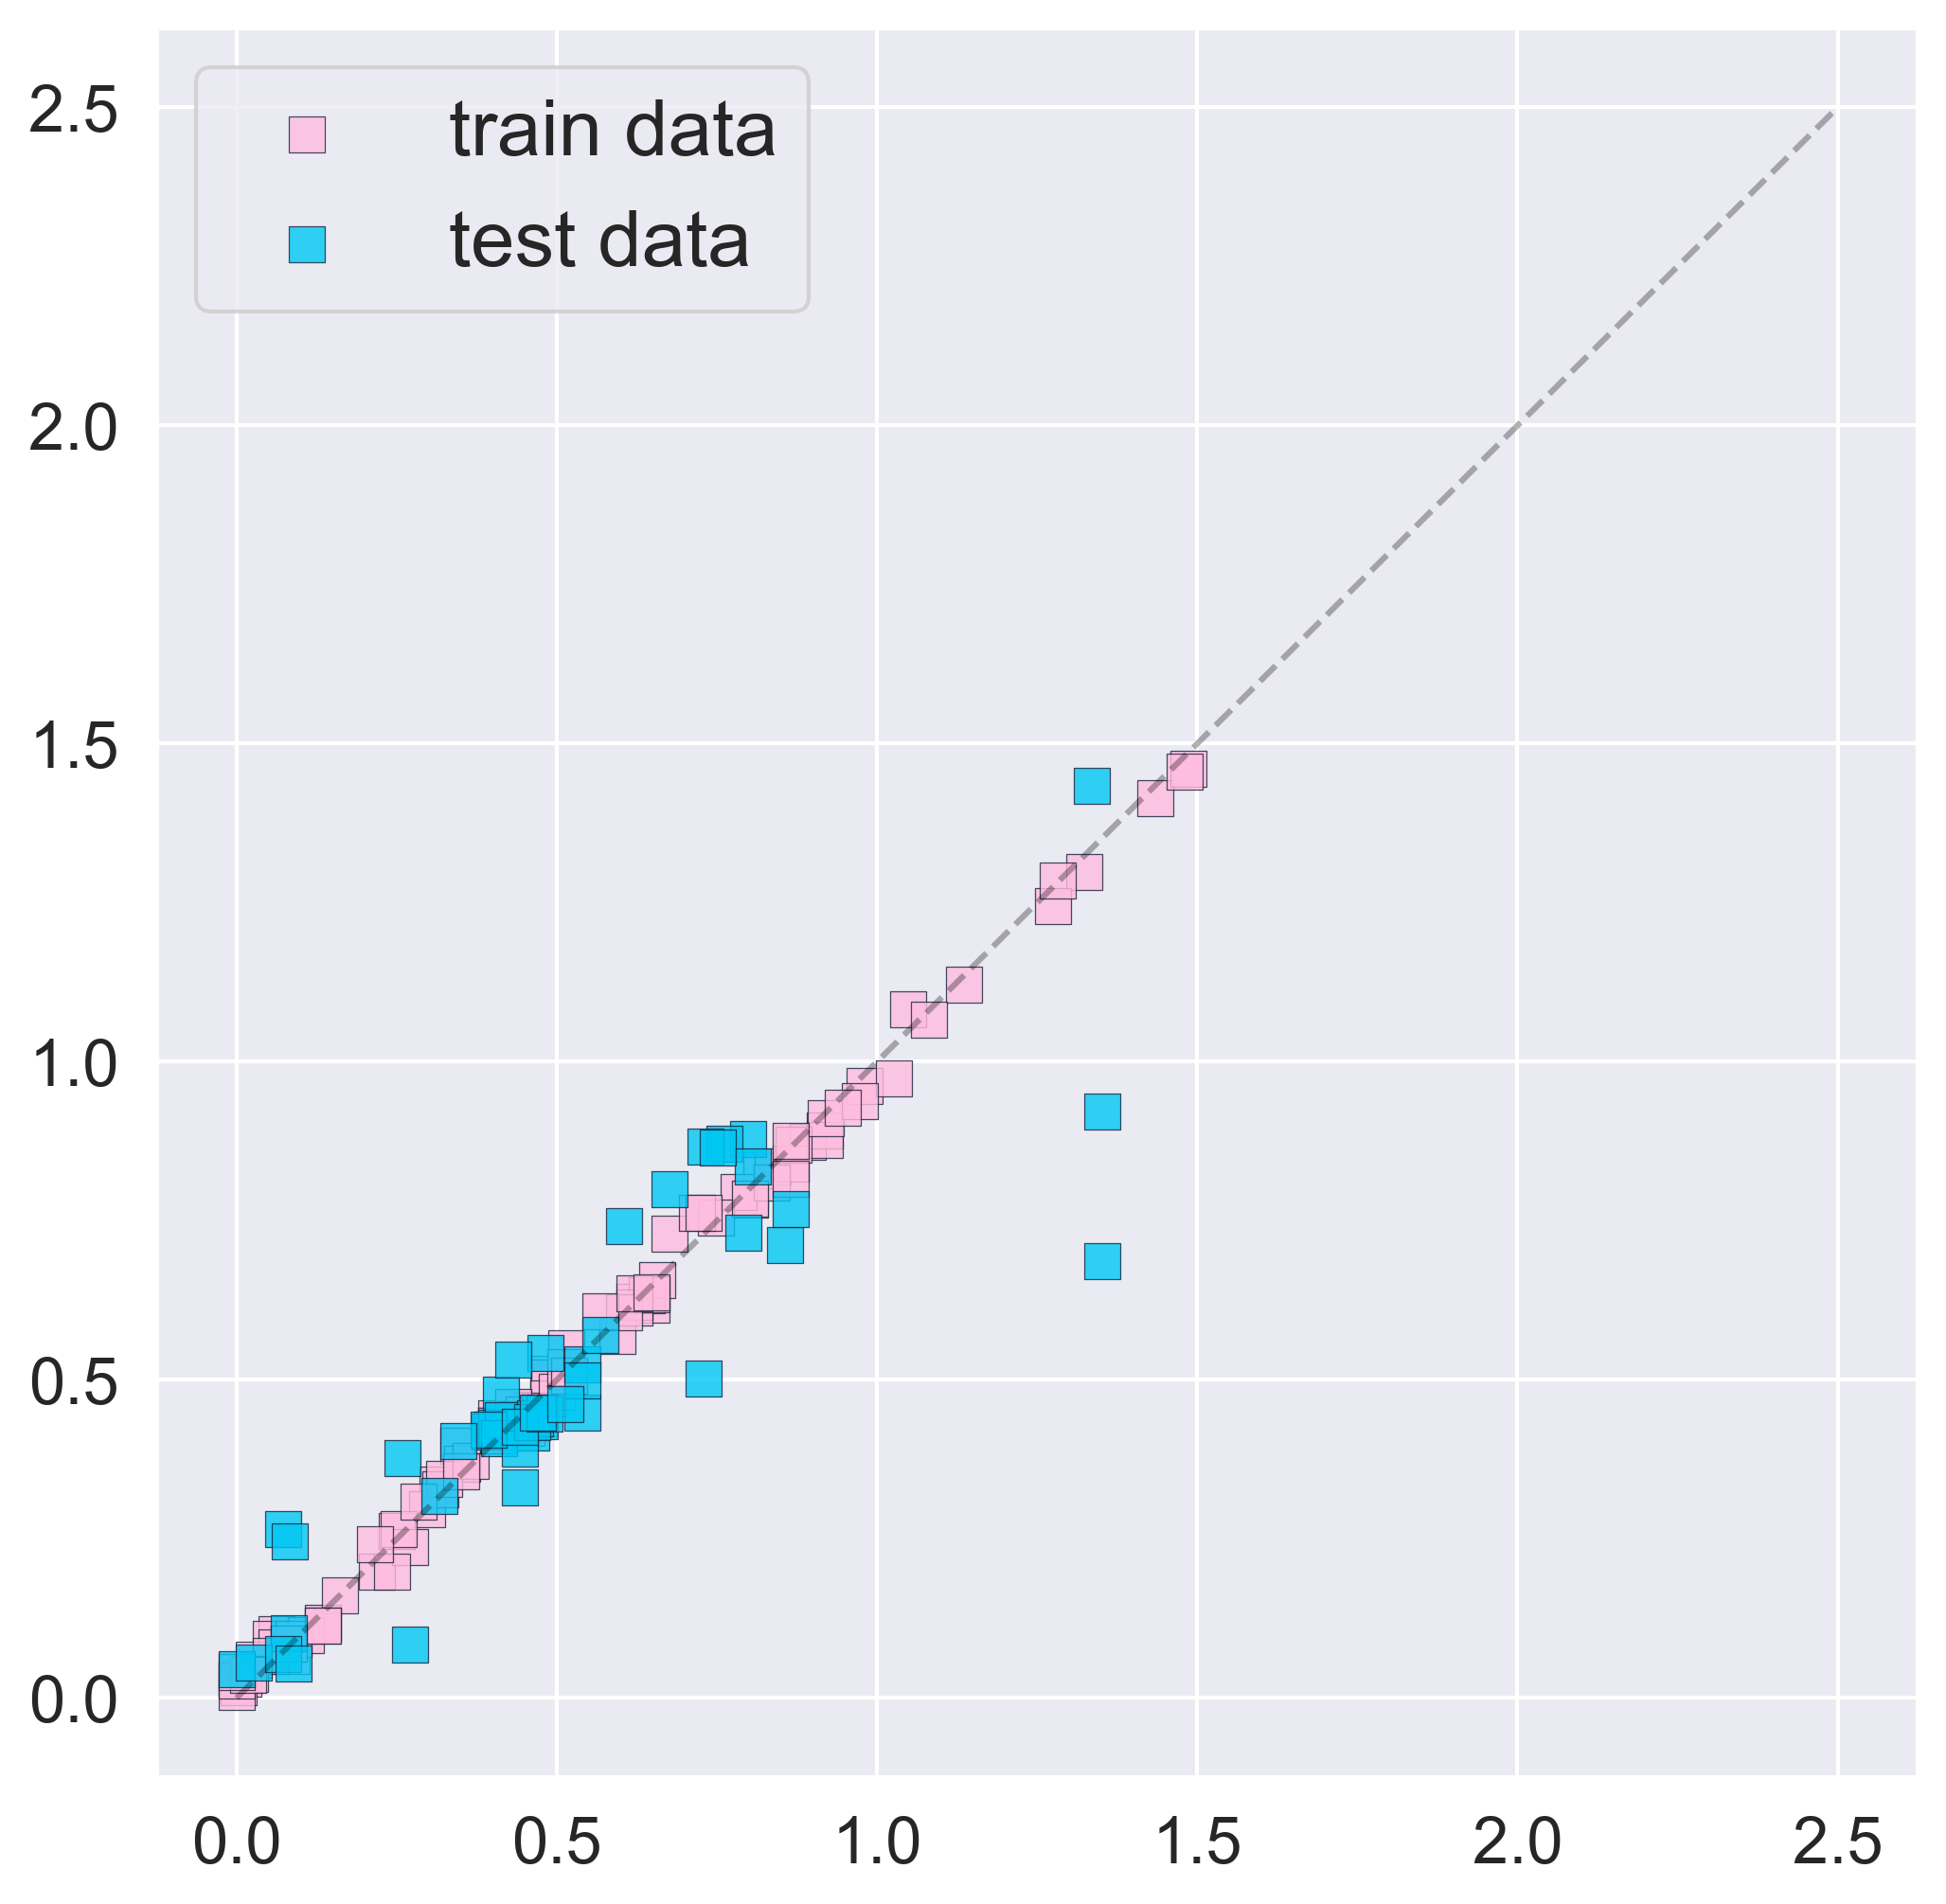

In [7]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
ytrain_pre = gbr.predict(X_train)
ytest_pre = gbr.predict(X_test)
df= pd.DataFrame({'y_train':y_train, 'ytrain_pre':ytrain_pre})
df.to_csv('GBDT_train.csv')
df2= pd.DataFrame({'y_test':y_test, 'ytrain_pre':ytest_pre})
df2.to_csv('GBDT_test.csv')
fig,ax = plt.subplots(figsize=(8, 8), dpi= 300)
plt.rcParams['font.sans-serif'] = ['Arial'] #字体均为 Arial
plt.rcParams['axes.unicode_minus']=False

scatter1 = plt.scatter(x=y_train, y=ytrain_pre, s=80, marker='s',c='#FFBCDE' , alpha=0.8, label='train data', linewidths=0.3, edgecolor='#17223b')
scatter2 = plt.scatter(x=y_test, y=ytest_pre,s=80, marker='s',c='#00C8F4' ,alpha=0.8, label='test data', linewidths=0.3, edgecolor='#17223b')
ax.plot([0,2.5],[0,2.5],'--',c='black',alpha=0.3)
plt.legend(loc='upper left',fontsize=20, frameon=True ,labelspacing=0.5)

In [8]:
from sklearn.model_selection import KFold,cross_val_score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
r2_scores = cross_val_score(gbr, X, y, scoring='r2', cv=crossvalidation, n_jobs=-1)
scores = cross_val_score(gbr, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=-1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 0.751
Folds: 10, mean RMSE: 0.148


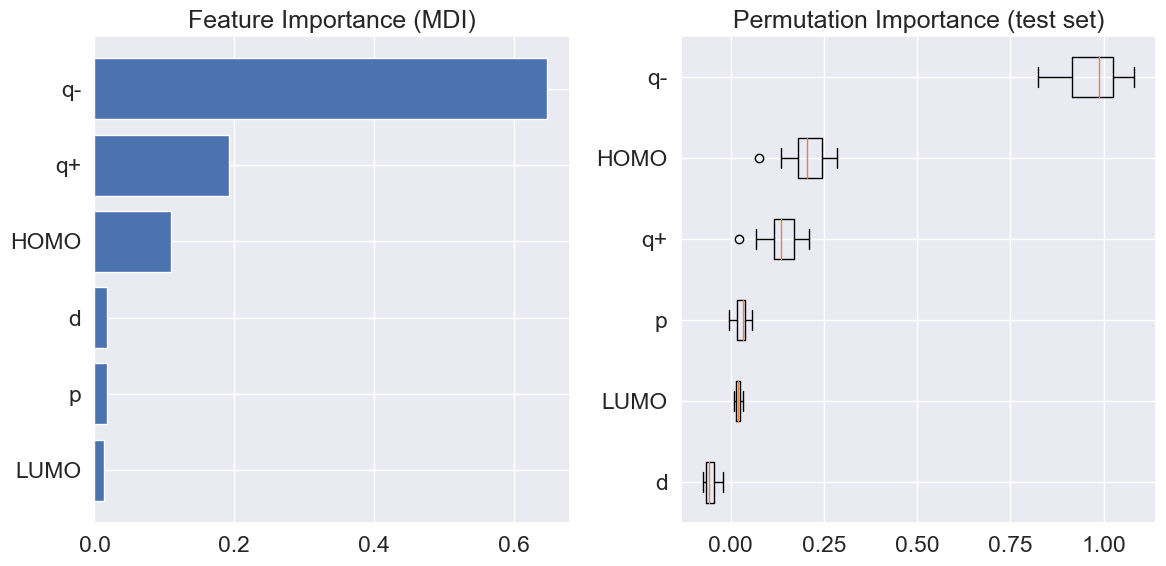

In [9]:
from sklearn.inspection import permutation_importance
feature_importance = gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
fearture_name=['q-','q+','HOMO','LUMO','d','p']
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(fearture_name)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    gbr, X_test, y_test, n_repeats=15, random_state=12, n_jobs=1
)
# print(result)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(fearture_name)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [50]:
import pickle
import xgboost as xgb

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=188)
xgb_model = xgb.XGBRegressor().fit(X_train,y_train)

In [52]:
print('training R2 = ' + str(round(xgb_model.score(X_train, y_train), 3)))
print('test R2 = ' + str(round(xgb_model.score(X_test, y_test), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=xgb_model.predict(X))))

training R2 = 1.0
test R2 = 0.749
training RMSE = 0.085


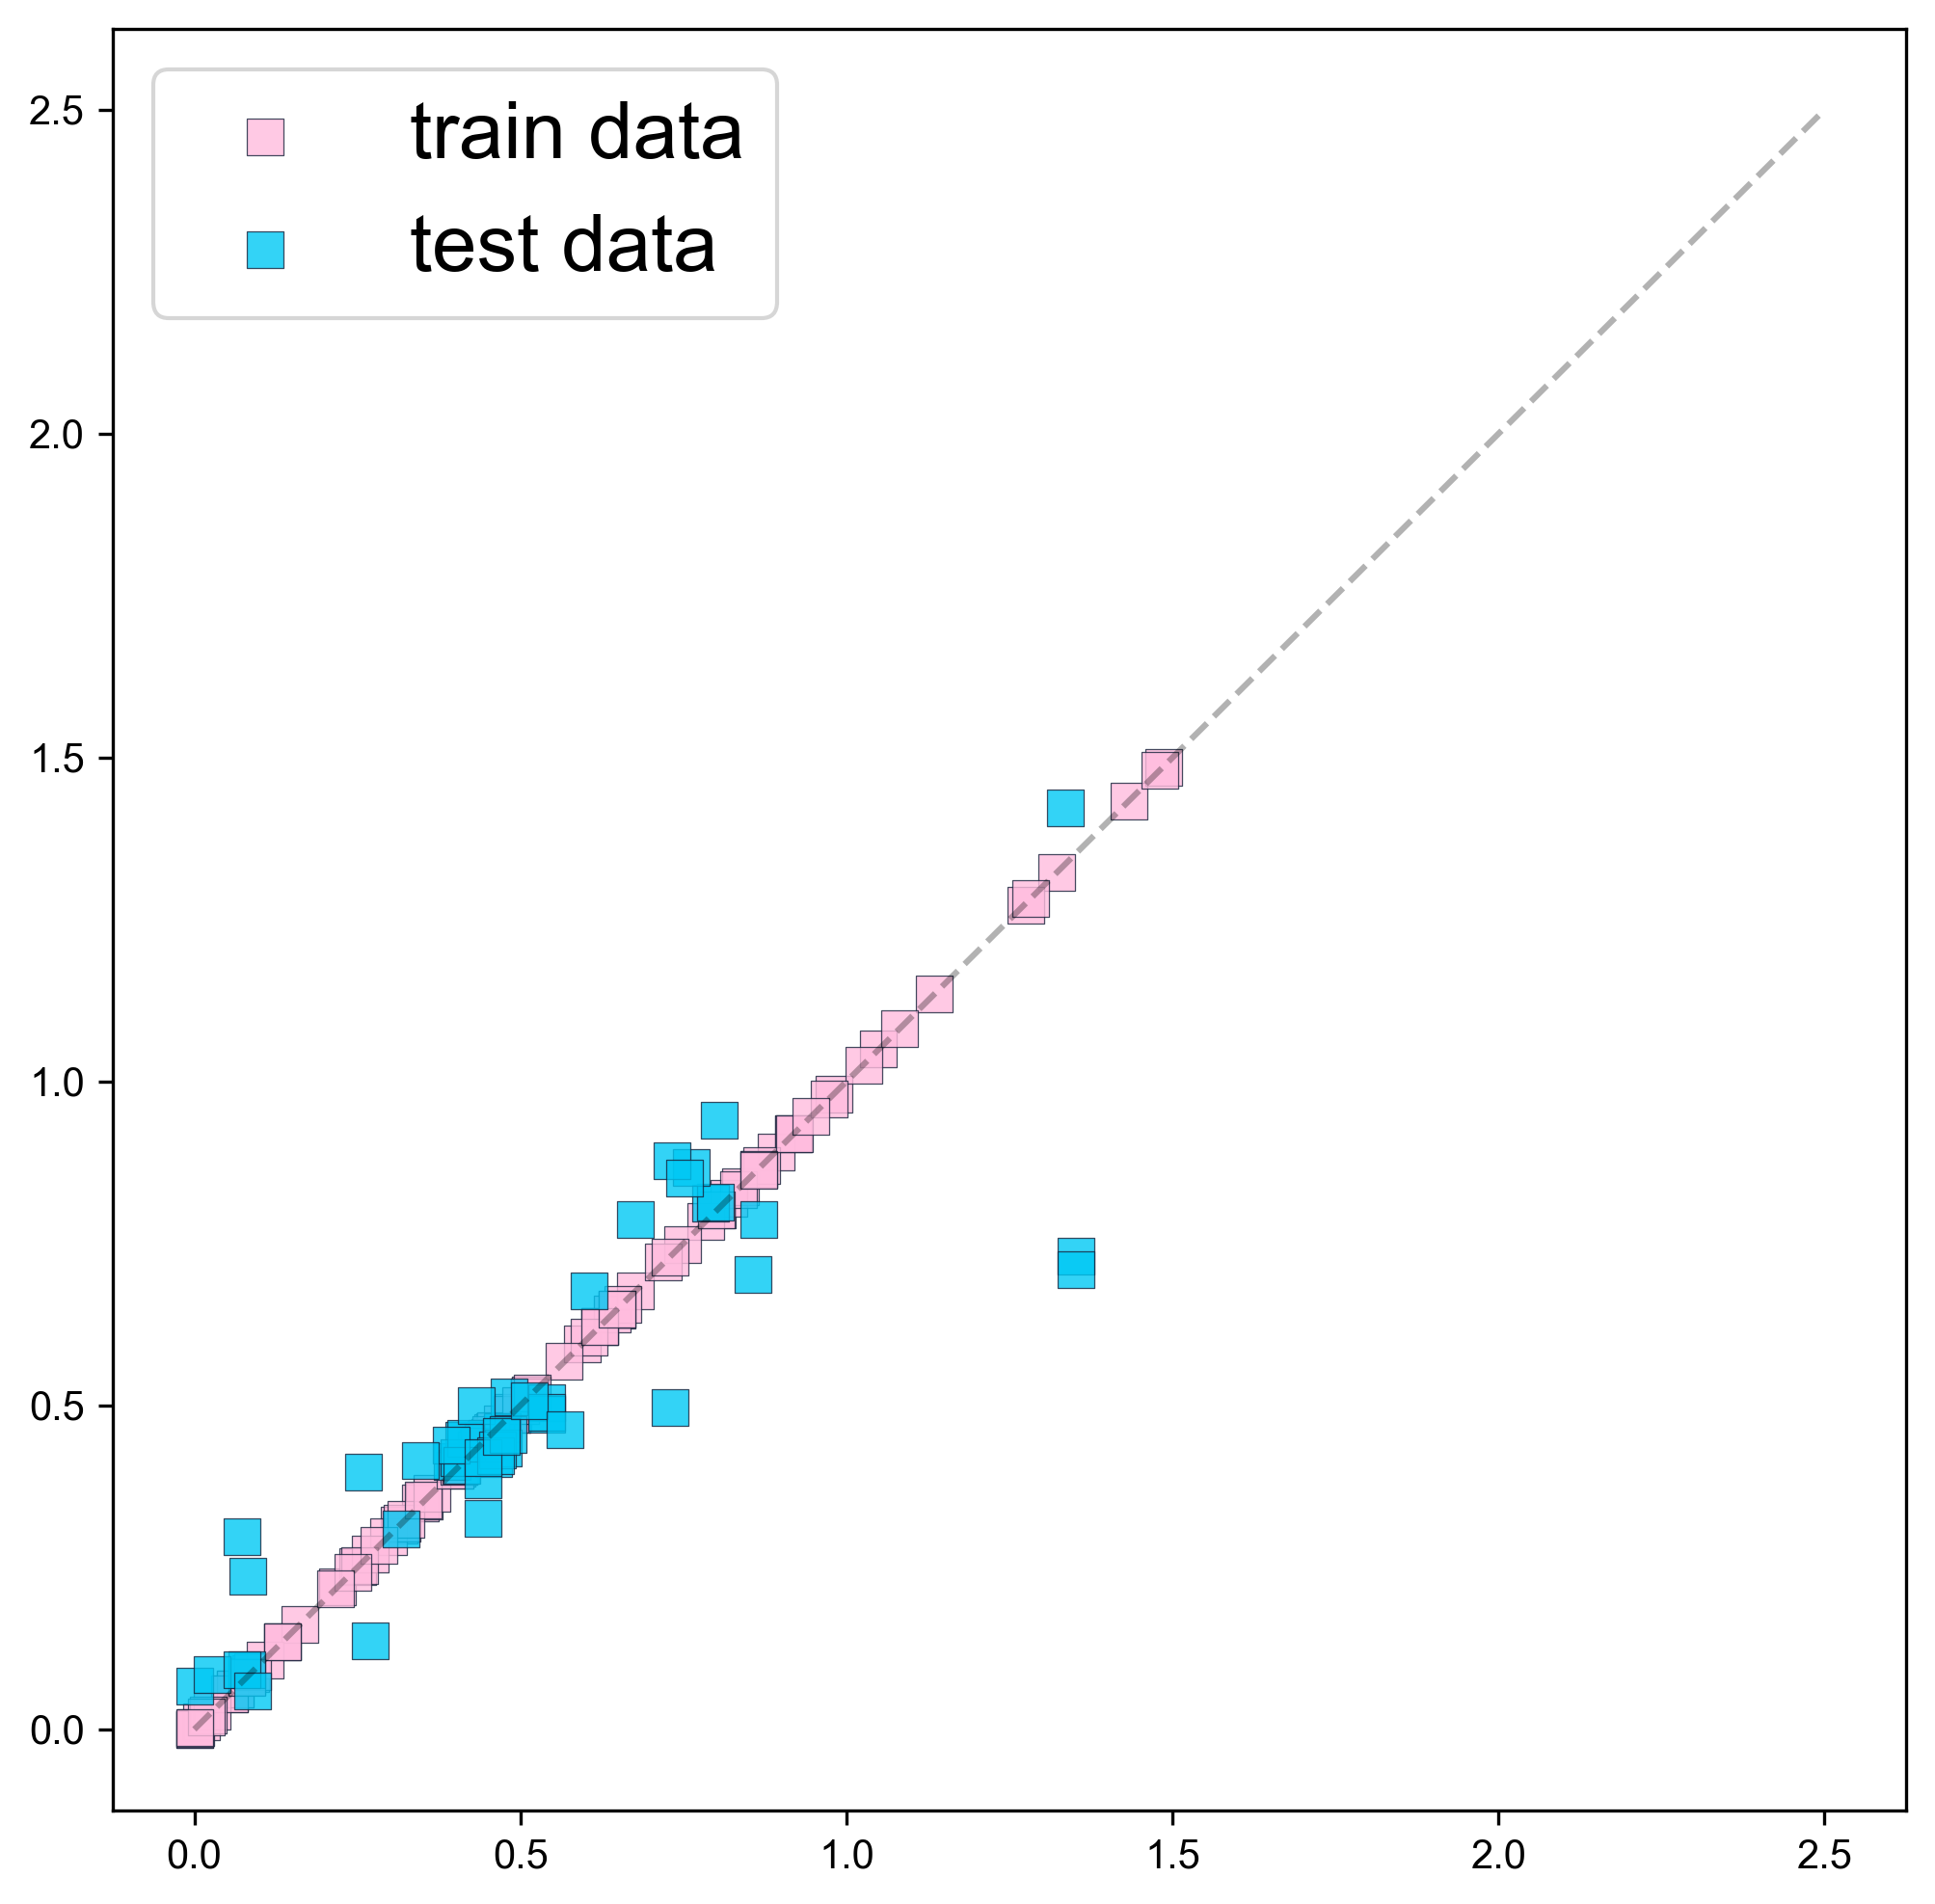

In [53]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
ytrain_pre = xgb_model.predict(X_train)
ytest_pre = xgb_model.predict(X_test)
df= pd.DataFrame({'y_train':y_train, 'ytrain_pre':ytrain_pre})
df.to_csv('XGB_train.csv')
df2= pd.DataFrame({'y_test':y_test, 'ytrain_pre':ytest_pre})
df2.to_csv('XGB_test.csv')
fig,ax = plt.subplots(figsize=(8, 8), dpi= 300)
plt.rcParams['font.sans-serif'] = ['Arial'] #字体均为 Arial
plt.rcParams['axes.unicode_minus']=False

scatter1 = plt.scatter(x=y_train, y=ytrain_pre, s=80, marker='s',c='#FFBCDE' , alpha=0.8, label='train data', linewidths=0.3, edgecolor='#17223b')
scatter2 = plt.scatter(x=y_test, y=ytest_pre,s=80, marker='s',c='#00C8F4' ,alpha=0.8, label='test data', linewidths=0.3, edgecolor='#17223b')
ax.plot([0,2.5],[0,2.5],'--',c='black',alpha=0.3)
plt.legend(loc='upper left',fontsize=20, frameon=True ,labelspacing=0.5)

In [54]:
from sklearn.model_selection import KFold,cross_val_score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
r2_scores = cross_val_score(xgb_model, X, y, scoring='r2', cv=crossvalidation, n_jobs=-1)
scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=-1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 0.743
Folds: 10, mean RMSE: 0.149


In [55]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon=0, random_state=30)
svm_reg.fit(X_train, y_train)
print('training R2 = ' + str(round(svm_reg.score(X_train, y_train), 3)))
print('test R2 = ' + str(round(svm_reg.score(X_test, y_test), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=svm_reg.predict(X))))

training R2 = 0.73
test R2 = 0.681
training RMSE = 0.180


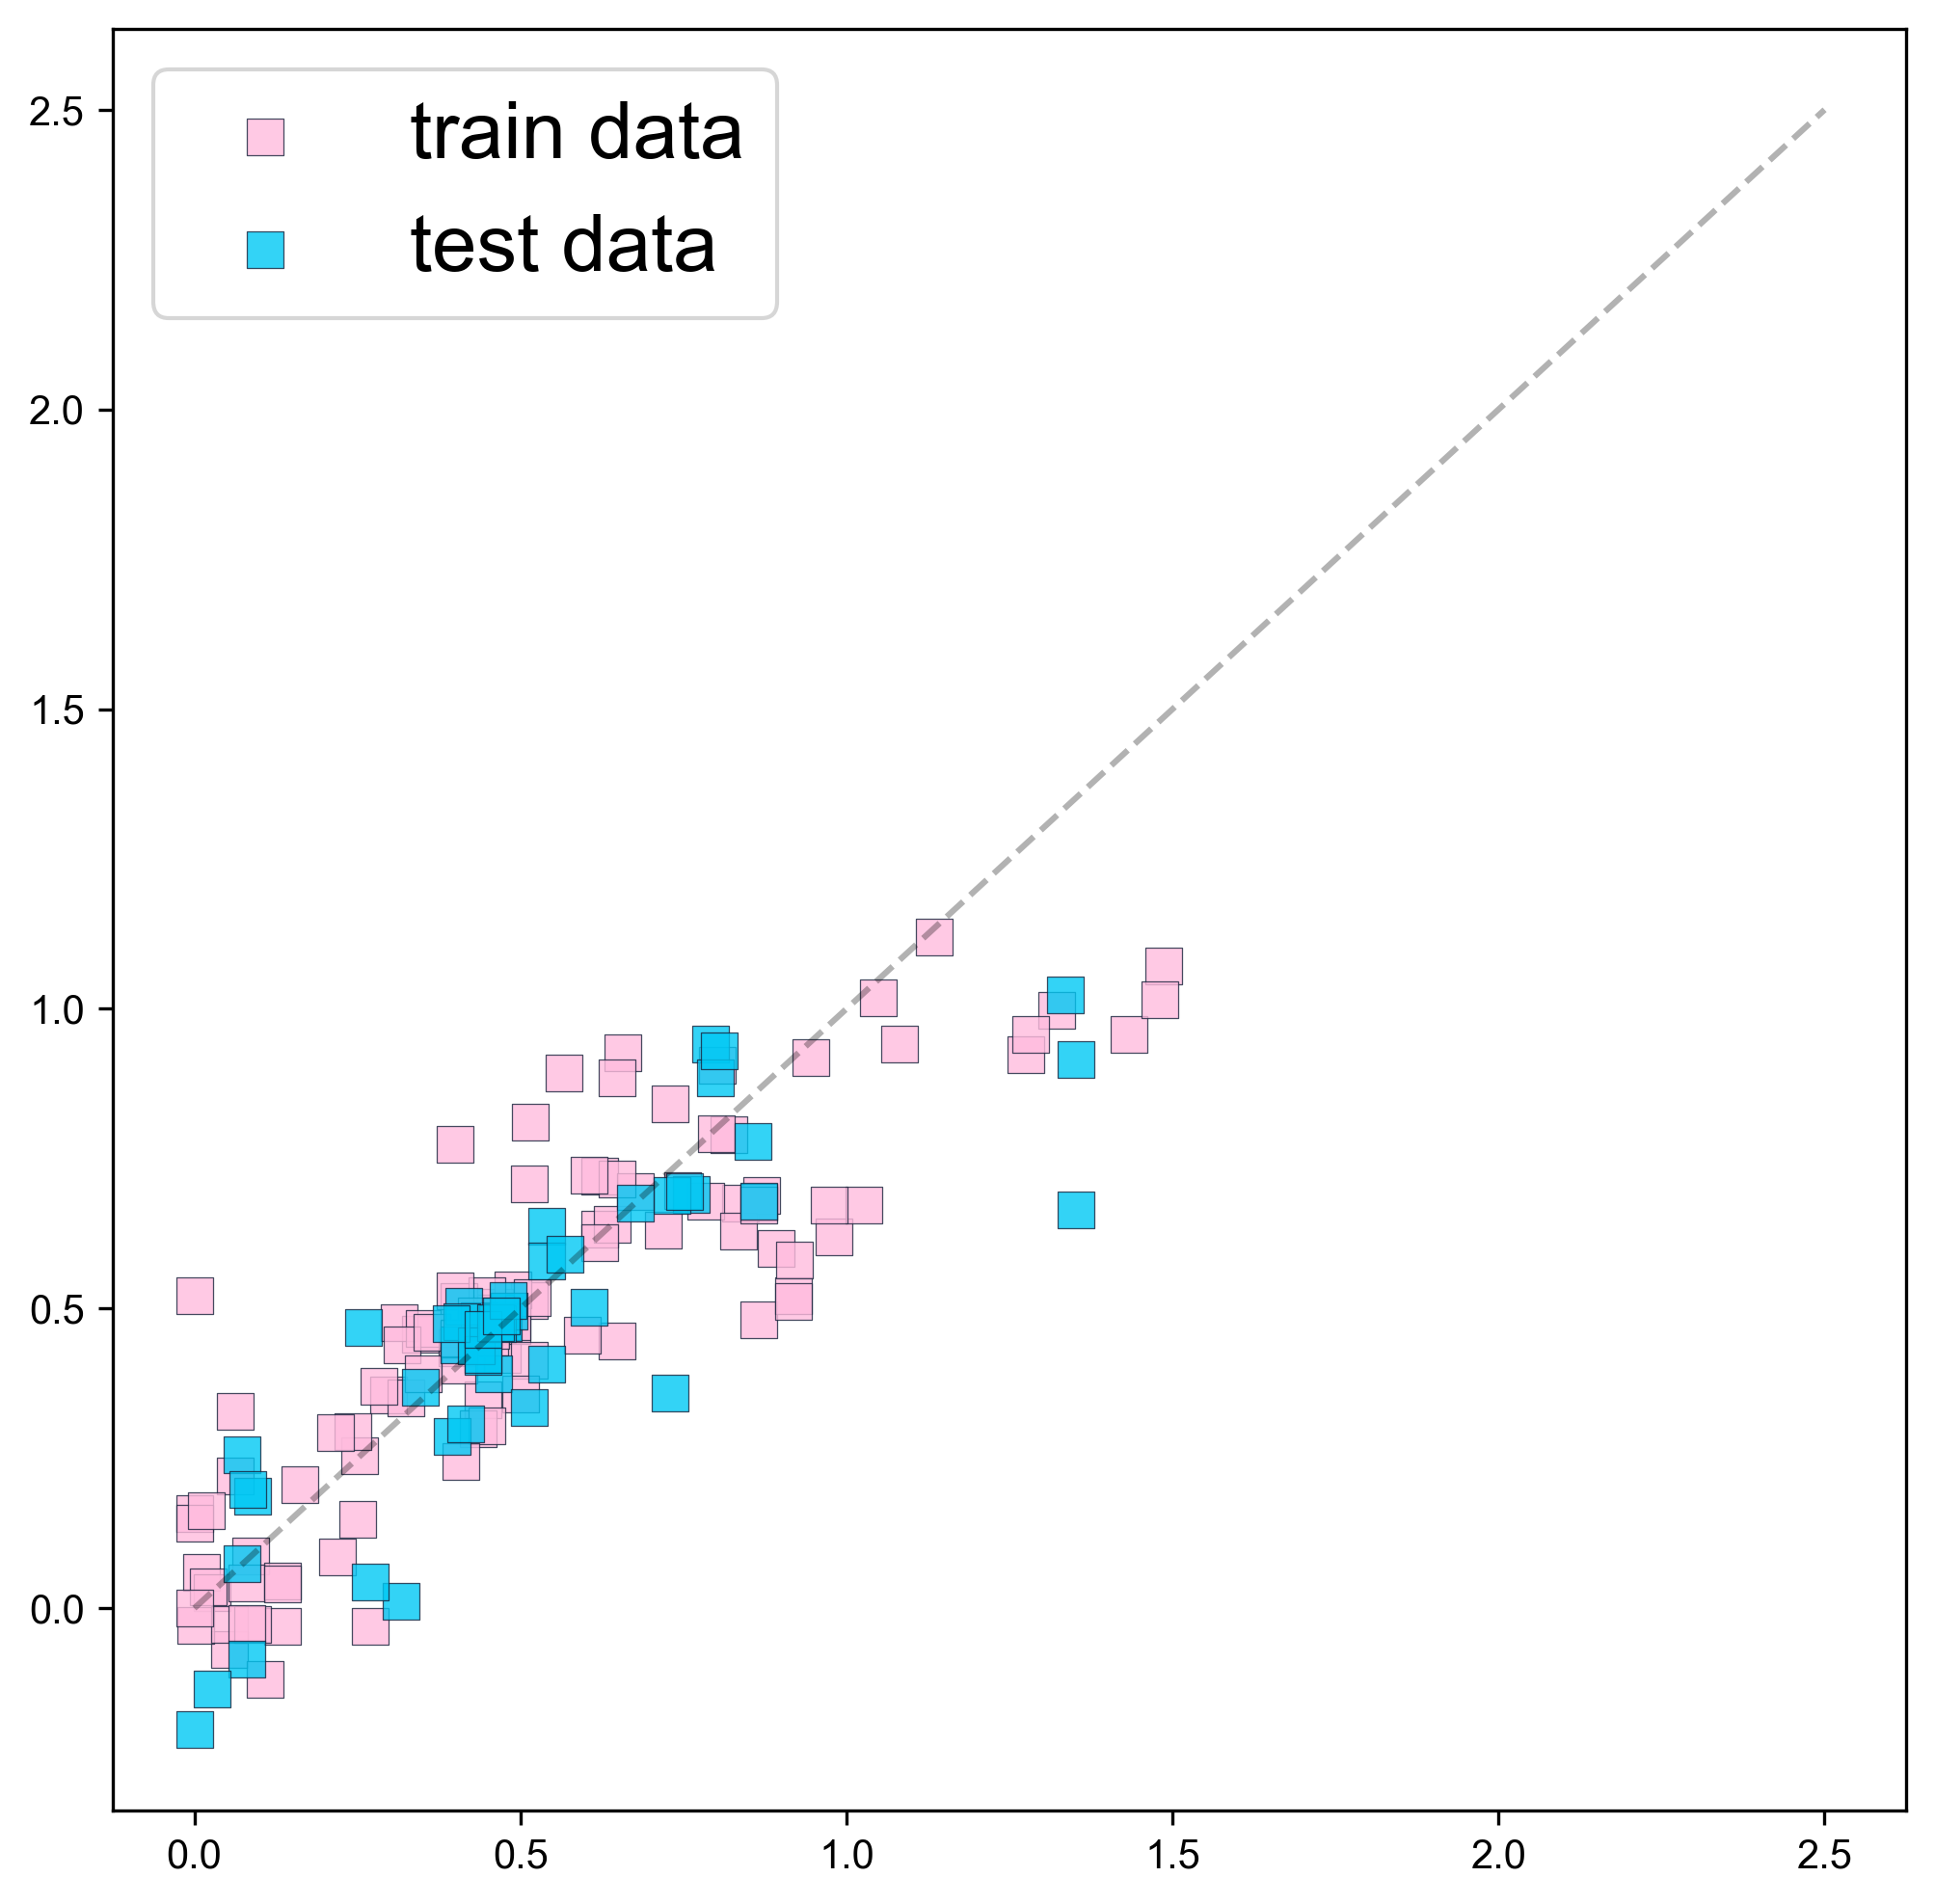

In [56]:
ytrain_pre = svm_reg.predict(X_train)
ytest_pre = svm_reg.predict(X_test)
df= pd.DataFrame({'y_train':y_train, 'ytrain_pre':ytrain_pre})
df.to_csv('SVM_train.csv')
df2= pd.DataFrame({'y_test':y_test, 'ytrain_pre':ytest_pre})
df2.to_csv('SVM_test.csv')
fig,ax = plt.subplots(figsize=(8, 8), dpi= 300)
plt.rcParams['font.sans-serif'] = ['Arial'] #字体均为 Arial
plt.rcParams['axes.unicode_minus']=False

scatter1 = plt.scatter(x=y_train, y=ytrain_pre, s=80, marker='s',c='#FFBCDE' , alpha=0.8, label='train data', linewidths=0.3, edgecolor='#17223b')
scatter2 = plt.scatter(x=y_test, y=ytest_pre,s=80, marker='s',c='#00C8F4' ,alpha=0.8, label='test data', linewidths=0.3, edgecolor='#17223b')
ax.plot([0,2.5],[0,2.5],'--',c='black',alpha=0.3)
plt.legend(loc='upper left',fontsize=20, frameon=True ,labelspacing=0.5)

In [57]:
from sklearn.model_selection import KFold,cross_val_score
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
r2_scores = cross_val_score(svm_reg, X, y, scoring='r2', cv=crossvalidation, n_jobs=-1)
scores = cross_val_score(svm_reg, X, y, scoring='neg_mean_squared_error', cv=crossvalidation, n_jobs=-1)
rmse_scores = [np.sqrt(abs(s)) for s in scores]
print('Cross-validation results:')
print('Folds: %i, mean R2: %.3f' % (len(scores), np.mean(np.abs(r2_scores))))
print('Folds: %i, mean RMSE: %.3f' % (len(scores), np.mean(np.abs(rmse_scores))))

Cross-validation results:
Folds: 10, mean R2: 0.641
Folds: 10, mean RMSE: 0.188


In [58]:
from sklearn.linear_model import Ridge
ri = Ridge(alpha=1.0)#实例化岭回归对象
ri.fit(X_train, y_train)#输入训练数据
print('training R2 = ' + str(round(ri.score(X_train, y_train), 3)))
print('test R2 = ' + str(round(ri.score(X_test, y_test), 3)))
print('training RMSE = %.3f' % np.sqrt(mean_squared_error(y_true=y, y_pred=ri.predict(X))))

training R2 = 0.743
test R2 = 0.702
training RMSE = 0.176
